In [1]:
import pandas as pd

df = pd.read_csv('data/TelcoCustomerChurn.csv')
df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df["TotalCharges"].replace(" ", pd.NA, inplace=True)

C:\Users\Mardon\AppData\Local\Temp\ipykernel_2924\253093788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].replace(" ", pd.NA, inplace=True)


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Churn')
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns, numerical_columns

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoder.fit(df[categorical_columns])
categorical_encoded = categorical_encoder.transform(df[categorical_columns])
df = df.drop(columns=categorical_columns)
df = pd.concat([df, pd.DataFrame(categorical_encoded, columns=categorical_encoder.get_feature_names_out(categorical_columns))], axis=1)
df["Churn"] = df["Churn"].map({'Yes': 1, 'No': 0})
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
scaler = StandardScaler()
scaler.fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994194,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.439916,0.066327,-0.259629,-0.173740,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.439916,-1.236724,-0.362660,-0.959649,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.439916,0.514251,-0.746535,-0.195248,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.439916,-1.236724,0.197365,-0.940457,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
df.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [9]:
df.dropna(inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']).values, df['Churn'].values, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 45), (1407, 45), (5625,), (1407,))

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.51      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

Confusion Matrix:
[[869 164]
 [182 192]]


In [14]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(KNeighborsClassifier(), param_grid={
    'n_neighbors': range(1, 11)
}, scoring='accuracy')
cv.fit(X_train, y_train)
print(f"Best parameters: {cv.best_params_}")
print(f"Best cross-validation score: {cv.best_score_:.2f}")

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.78


In [19]:
cv.cv_results_

{'mean_fit_time': array([0.00165648, 0.00160198, 0.00144858, 0.00131783, 0.00120859,
        0.00120158, 0.00133166, 0.0015481 , 0.00113606, 0.00123897]),
 'std_fit_time': array([0.00049728, 0.00031458, 0.00026119, 0.000153  , 0.00013041,
        0.00012774, 0.00010005, 0.00022171, 0.00025139, 0.00012938]),
 'mean_score_time': array([0.01012592, 0.00965638, 0.00902572, 0.00996404, 0.00874681,
        0.00851274, 0.00955367, 0.01066628, 0.00911851, 0.01004257]),
 'std_score_time': array([0.00048807, 0.00173907, 0.00098069, 0.00072047, 0.00103453,
        0.0007617 , 0.00083704, 0.0001582 , 0.00104738, 0.00084055]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  

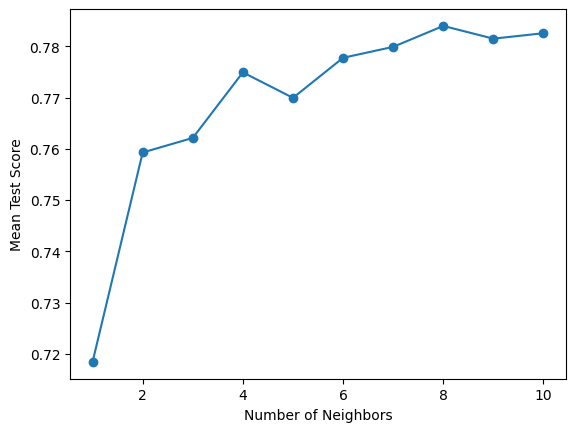

In [22]:
import matplotlib.pyplot as plt

plt.plot(cv.cv_results_['param_n_neighbors'], cv.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.show()

In [23]:
knn_minkowski = KNeighborsClassifier(metric='minkowski')
knn_minkowski.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
knn_minkowski_y_pred = knn_minkowski.predict(X_test)
knn_minkowski_accuracy = accuracy_score(y_test, knn_minkowski_y_pred)
print(f"Minkowski Metric Accuracy: {knn_minkowski_accuracy:.2f}")

Minkowski Metric Accuracy: 0.75
